In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

### 訂定 loss function

    
   $f(x) = x^4 + x^3 - 5x^2 + 18x + 9487$ 



In [228]:
#定義出 loss function 並先做圖觀察
x0 = np.arange(-100,100,0.01)

def loss(x):
    y = x**4 + x**3 - 5*x**2 + 18*x +9487
    return(y)

y = []

for i in range(len(x0)):
    y.append(loss(x0[i]))

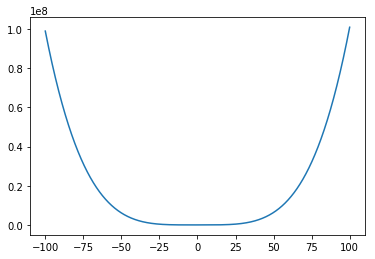

In [229]:
plt.plot(x0,y)

從圖看來最小值可能發生在 x = 0 附近的位置

#### 對 x 做一階微分的函式

In [230]:
def loss_1(x):
    slope = 4*x**3 + 3*x**2 - 10*(x) + 18
    return(slope)

#### 重複解根 100次，確保答案的正確性

    由於解根結果可能會受隨機起始值的影響，因此重複做100次，並對這100次結果做描述性統計，若這 100 非常集中，則平均值則是理想的解根答案。
    
    從圖來看，起始值的範圍應該可以設在 -100 ~ 100

In [231]:
learning_rate = 0.00001
ans = []

for i in range(100):
    
    #起始值由 np.arange(-100,100,0.01) 隨機選取一個
    x = np.random.choice(x0,size = 1)[0]
    
    while True:
        y = loss(x)
        delta = loss_1(x)
        x += -1*delta*learning_rate
        y_new = loss(x)
        if(y_new >= y):
            ans.append(x+delta*learning_rate)
            break


#### 敘述這100筆答案的集中與離散

In [232]:
#平均值
np.mean(ans)

-2.484876083581984

In [182]:
#最大值
max(ans)

-2.4848681153853205

In [184]:
#最小值
min(ans)

-2.484885463155453

In [185]:
#標準差
np.std(ans)

8.509122639660726e-06

#### 100次答案均集中於 -2.4848

     平均值與最大最小值的差異微乎其微，且標準差為 8*10^-6，代表100次答案均集中於 -2.4848。因此當 x = -2.4848 時 loss function 有最小值。


### 來互動囉！自訂起始值與 learning rate，看看結果有何不同？ 

    自訂起始值或learning rate，看100次解根答案的平均值是否與正確答案有差，並透過標準差得知 100 次答案的離散程度。

In [188]:
from ipywidgets import interact

#### 自訂起始值 

In [200]:
def forfun(start):
    learning_rate = 0.00001
    ans = []
    for i in range(100):
        #起始值由互動來自訂
        x = start
        while True:
            y = loss(x)
            delta = loss_1(x)
            x += -1*delta*learning_rate
            y_new = loss(x)
            if(y_new >= y):
                ans.append(x+delta*learning_rate)
                break
    print("解根平均值為",np.mean(ans))
    print("解根標準差為",np.std(ans))

In [202]:
#起始值的互動範圍調寬一點，由 -150 ~ 150
interact(forfun,start=(-150,150))

interactive(children=(IntSlider(value=0, description='start', max=150, min=-150), Output()), _dom_classes=('wi…

<function __main__.forfun(start)>

可以發現起始值從 -150~150 解根均平均值為 -2.4848，且標準差都很接近0，代表100次解根均集中於 -2.4848。

#### 自訂 Learning rate 

In [204]:
def forfun2(lr):
    # learning rate 自訂
    learning_rate = lr
    ans = []
    for i in range(100):    
        x = np.random.choice(x0,size = 1)[0]
        while True:
            y = loss(x)
            delta = loss_1(x)
            x += -1*delta*learning_rate
            y_new = loss(x)
            if(y_new >= y):
                ans.append(x+delta*learning_rate)
                break
    print("解根平均值為",np.mean(ans))
    print("解根標準差為",np.std(ans))

In [210]:
#Learning rate 調整範圍： 0.00001 ~ 1
interact(forfun2,lr=np.arange(0.00001,1,0.00001))

interactive(children=(Dropdown(description='lr', options=(1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, …

<function __main__.forfun2(lr)>

#### 討論

    由原先的 learning rate (0.00001) 上升到 1 的過程中，解根的標準差越來越大，代表答案的離散程度越大。更重要的是，到 learning rate >= 0.00007 後已經不是正確答案了 (-1.0861)。
    若 learning rate 太大 (e.g. 0.1)，則 x 會直接跳過最小值。原先的0.00001是在顧及答案的正確性及程式運作速度下的最佳 learning rate，小於 0.00001 的話會更精確，但運作速度太慢。